# Import Libraries

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df=pd.read_csv('blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


# EDA

In [3]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,alt.atheism
freq,1,100


In [4]:
df.isna().sum()


,0
Data,0
Labels,0


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

# Data Cleaning

In [7]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [8]:
clean

<function __main__.<lambda>(x)>

In [9]:
df['Data'] = df.Data.apply(clean)
df.Data

,Data
0,path \nfrom frank odwyer\nnewsgroups altathei...
1,newsgroups altatheism\npath \nfrom bilokcforum...
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,path \nfrom jbrownbatmanbmdtrwcom\nnewsgroups ...
4,xref cantaloupesrvcscmuedu \nnewsgroups alta...
...,...
1995,xref cantaloupesrvcscmuedu \npath \nfrom fr...
1996,xref cantaloupesrvcscmuedu \nnewsgroups talk...
1997,xref cantaloupesrvcscmuedu \npath cantaloupes...
1998,xref cantaloupesrvcscmuedu \npath cantaloupes...


In [10]:
#Word frequency
freq = pd.Series(' '.join(df['Data']).split()).value_counts()[:20] # for top 20
freq

,count
the,26780
to,13429
of,12697
a,11214
and,10863
in,9068
i,8155
is,7970
that,7092
it,5509


In [12]:

  >>> import nltk
  >>> nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [14]:
#removing stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Data'] = df['Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [15]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(df['Data']).split()).value_counts()[:20] # for top 20
freq_Sw

,count
subject,2170
lines,2086
date,2083
path,2046
newsgroups,2038
messageid,2006
organization,1979
apr,1940
gmt,1785
one,1588


In [16]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [18]:

  >>> import nltk
  >>> nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
# Tokenize the text
df['tokenized_blog_text'] = df['Data'].apply(word_tokenize)

# Display the tokenized version of the text
df[['Data', 'tokenized_blog_text']].head()

,Data,tokenized_blog_text
0,path frank odwyer newsgroups altatheism subjec...,"[path, frank, odwyer, newsgroups, altatheism, ..."
1,newsgroups altatheism path bilokcforumosrheedu...,"[newsgroups, altatheism, path, bilokcforumosrh..."
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,"[path, cantaloupesrvcscmuedudasnewsharvardedun..."
3,path jbrownbatmanbmdtrwcom newsgroups altathei...,"[path, jbrownbatmanbmdtrwcom, newsgroups, alta..."
4,xref cantaloupesrvcscmuedu newsgroups altathei...,"[xref, cantaloupesrvcscmuedu, newsgroups, alta..."


#### Feature Extraction

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
cv = CountVectorizer()

x = cv.fit_transform(df['Data'])
x

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 238006 stored elements and shape (2000, 39190)>

In [22]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
cv.vocabulary

In [24]:
cv.get_feature_names_out

<bound method CountVectorizer.get_feature_names_out of CountVectorizer()>

In [25]:
pd.DataFrame(x.toarray(),columns=cv.get_feature_names_out())

,aa,aaa,aaaaarrrrgh,aaboston,aalternate,aaltonen,aam,aan,aangegeven,aantal,...,zwak,zwakke,zwar,zware,zwarte,zyda,zydacsnpsnavymil,zyehcaspianuscedu,zyxel,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
print(x.toarray().shape)

(2000, 39190)


# TF-IDF

In [27]:
tf = TfidfVectorizer()

data = tf.fit_transform(df['Data'])
data.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
x = pd.DataFrame(data.toarray(), columns=tf.get_feature_names_out())
x

,aa,aaa,aaaaarrrrgh,aaboston,aalternate,aaltonen,aam,aan,aangegeven,aantal,...,zwak,zwakke,zwar,zware,zwarte,zyda,zydacsnpsnavymil,zyehcaspianuscedu,zyxel,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
y=df['Labels']
y

,Labels
0,alt.atheism
1,alt.atheism
2,alt.atheism
3,alt.atheism
4,alt.atheism
...,...
1995,talk.religion.misc
1996,talk.religion.misc
1997,talk.religion.misc
1998,talk.religion.misc


In [30]:
print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (2000, 39190)
y shape: (2000,)


In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(xtrain, ytrain)

MultinomialNB()

In [33]:
# Predict the labels on the test set
y_pred = nb_classifier.predict(xtest)
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'sci.electronics', 'sci.electronics',
       'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism',
       'sci.med', 'alt.atheism', 'sci.electronics', 'sci.crypt',
       'rec.sport.baseball', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.autos', 'comp.graphics',
       'talk.politics.guns', 'talk.politics.misc',
       'comp.sys.mac.hardware', 'alt.atheism', 'alt.atheism',
       'rec.sport.hockey', 'alt.atheism', 'sci.crypt',
       'talk.politics.misc', 'rec.sport.baseball', 'rec.autos',
       'alt.atheism', 'rec.sport.baseball', 'rec.sport.hockey',
       'comp.windows.x', 'rec.sport.baseball', 'rec.sport.hockey',
       'comp.sys.mac.hardware', 'sci.med', 'sci.electronics',
       'rec.sport.hockey', 'comp.os.ms-windows.misc', 'sci.electronics',
       'soc.religion.christian', 'comp.os.ms-windows.misc',
       'talk.politics.misc', 'soc.religion.christian

In [34]:
from sklearn.metrics import accuracy_score, classification_report

In [35]:
# Evaluate the performance
print("Accuracy:", accuracy_score(ytest, y_pred))
print("\nClassification Report:")
print(classification_report(ytest, y_pred))

Accuracy: 0.83

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.53      0.94      0.68        18
           comp.graphics       0.75      0.83      0.79        18
 comp.os.ms-windows.misc       0.95      0.82      0.88        22
comp.sys.ibm.pc.hardware       0.91      0.80      0.85        25
   comp.sys.mac.hardware       0.83      0.95      0.89        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       0.92      0.67      0.77        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.78      0.95      0.86        19
         sci.electronics       0.74      0.88      0.80        16
                 sci.med       0.94 

# Sentiment Analysis & Evaluation

In [36]:
!pip install textblob

In [37]:
from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the Data column
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Display the first few rows with sentiment
print(df[['Data', 'Sentiment']].head())

                                                Data Sentiment
0  path frank odwyer newsgroups altatheism subjec...  Positive
1  newsgroups altatheism path bilokcforumosrheedu...  Negative
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  Positive
3  path jbrownbatmanbmdtrwcom newsgroups altathei...  Positive
4  xref cantaloupesrvcscmuedu newsgroups altathei...  Positive


In [38]:
from sklearn .metrics import accuracy_score, precision_score, recall_score, f1_score

In [39]:
print("\nclassification Report")
print(classification_report(ytest, y_pred))


classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.53      0.94      0.68        18
           comp.graphics       0.75      0.83      0.79        18
 comp.os.ms-windows.misc       0.95      0.82      0.88        22
comp.sys.ibm.pc.hardware       0.91      0.80      0.85        25
   comp.sys.mac.hardware       0.83      0.95      0.89        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       0.92      0.67      0.77        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.78      0.95      0.86        19
         sci.electronics       0.74      0.88      0.80        16
                 sci.med       0.94      0.88      0

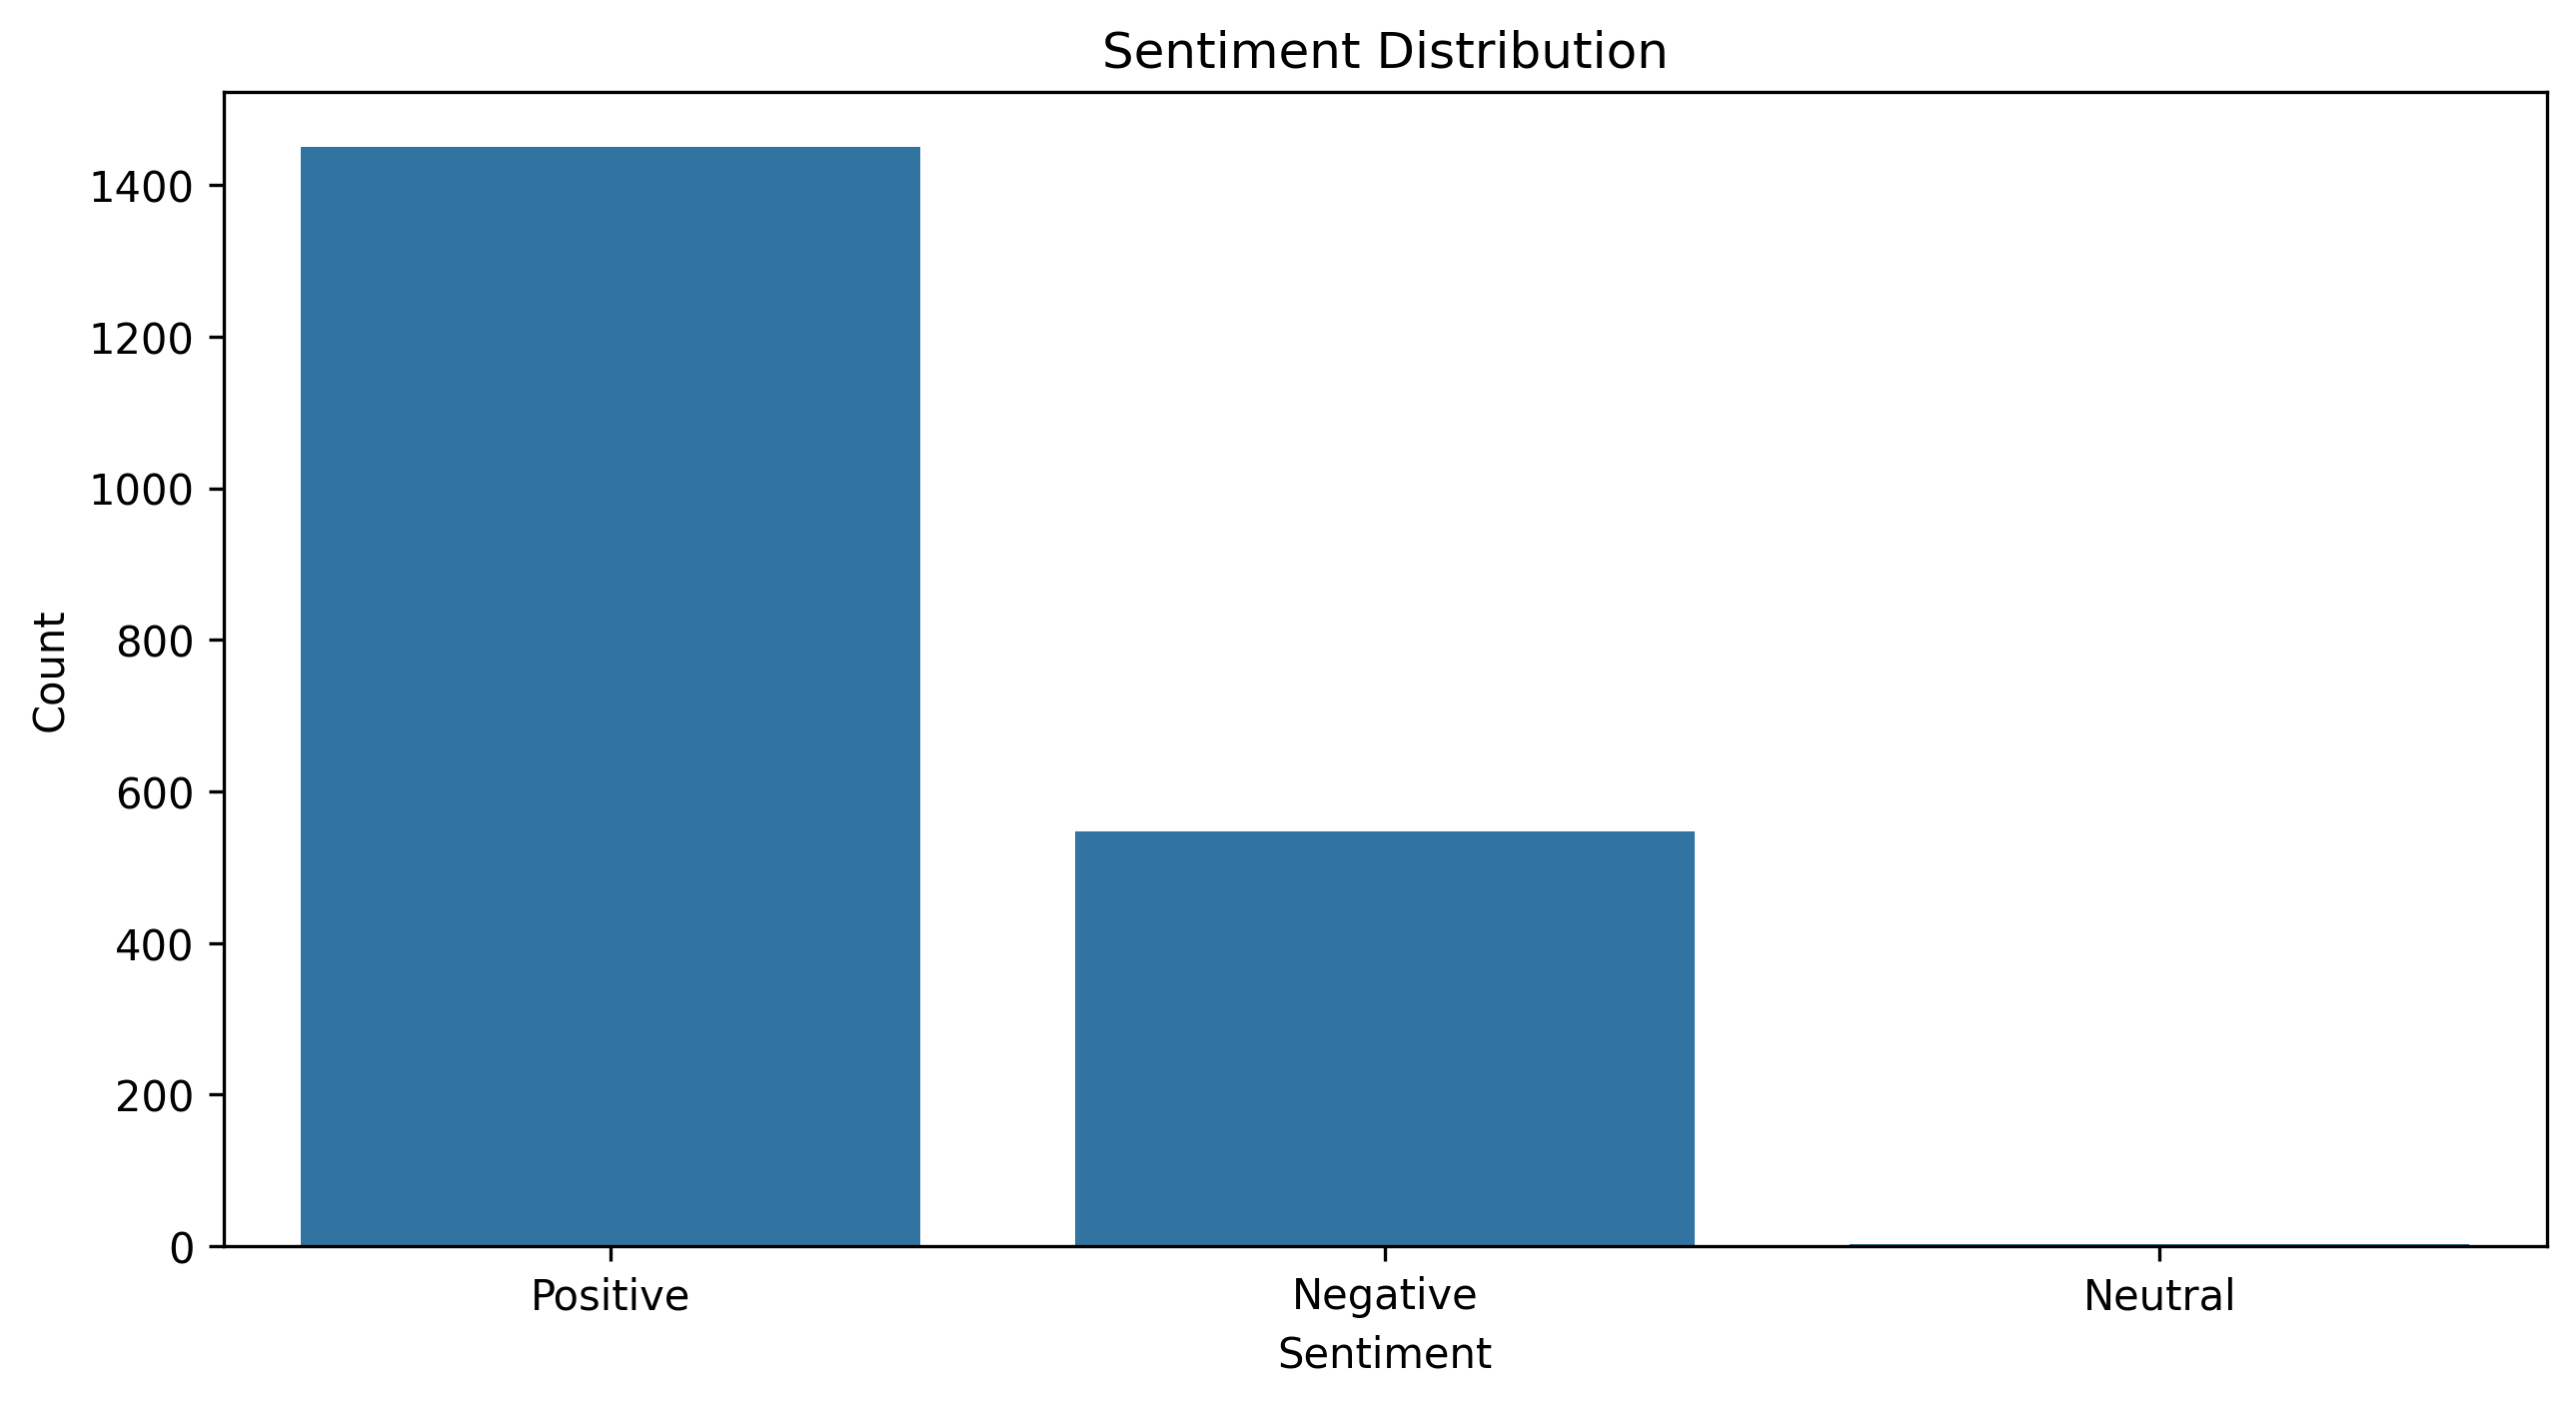

In [40]:
# Count sentiments
sentiment_counts = df['Sentiment'].value_counts()
# Plot the distribution
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()